# Setup

In [22]:
#To support both python and python 3
from __future__ import division, print_function, unicode_literals

#Common imports
import numpy as np
import numpy.random as rnd
import os

#To make this notebook's output reproduceable
rnd.seed(42)

#To plot figures
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

#Where to save your figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "fundamentals"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id, "at:", path)
    
    if tight_layout:
        #give plot padding (This is fancy but might be useful in the future)
        plt.tight_layout()
    plt.savefig(path, format="png", dpi=300)

# Load and prepare Life satisfaction data

In [23]:
import pandas as pd

#Download CSV from http://stats.oecd.org/index.aspx?DataSetCode=BLI
datapath = "datasets/lifesat/"
#read the csv file                                #thousands separator
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=",")
#Get the oecd_bli set only where the INEQUALITY == "TOT" get rid of everything else
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"] == "TOT"]
#Ok this one is a little tricky and took me some time to get through it.
#So basically the ID/key or "index" of the spreadsheet is the column "Country", 
#aka what you want to group by. The column(s) in this instance is "Indicator"
#which is what you want to pivot on, so all the distinct values that are in
#the column you want to pivot on now become columns instead of row values and the
#value associated with the new columns is the column Value
oecd_bli = oecd_bli.pivot(index="Country", columns = "Indicator", values="Value")

oecd_bli.head(2)
oecd_bli.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37 entries, Australia to United States
Data columns (total 24 columns):
Air pollution                                37 non-null float64
Assault rate                                 37 non-null float64
Consultation on rule-making                  37 non-null float64
Dwellings without basic facilities           37 non-null float64
Educational attainment                       37 non-null float64
Employees working very long hours            37 non-null float64
Employment rate                              37 non-null float64
Homicide rate                                37 non-null float64
Household net adjusted disposable income     37 non-null float64
Household net financial wealth               37 non-null float64
Housing expenditure                          37 non-null float64
Job security                                 37 non-null float64
Life expectancy                              37 non-null float64
Life satisfaction                     

In [24]:
#Show the calculated Life satisfaction head (top 5 rows)
oecd_bli["Life satisfaction"].head()

Country
Australia    7.3
Austria      6.9
Belgium      6.9
Brazil       7.0
Canada       7.3
Name: Life satisfaction, dtype: float64

# Load and prepare GDP per capita data

In [25]:
#Load the dataset from a csv file, the thousands separator is a ',', the delimeter
#is a tab, the encoding of the file is latin1, and na values are marked as n/a
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv", 
                             thousands=",", delimiter="\t",
                            encoding="latin1", na_values = "n/a")
#Rename the columns to more appropriate names
gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
#Set the index/ID/key value to "Country"
gdp_per_capita.set_index("Country", inplace=True)

#show top 5 rows
gdp_per_capita.head()

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [26]:
#Merge the dataframes together using the key of both right_index and left_index
full_country_stats = pd.merge(left = oecd_bli, right = gdp_per_capita, 
                              left_index = True, right_index = True)
#Sort the rows by GDP per capita ascending
full_country_stats.sort_values(by="GDP per capita", inplace=True)
full_country_stats

,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,14.97,79.0,72.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",8669.998,2014.0
Mexico,30.0,12.8,9.0,4.2,37.0,28.83,61.0,23.4,13085.0,9056.0,...,13.89,63.0,67.0,14.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9009.280,2015.0
Russia,15.0,3.8,2.5,15.1,94.0,0.16,69.0,12.8,19292.0,3412.0,...,14.97,65.0,56.0,16.0,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9054.914,2015.0
Turkey,35.0,5.0,5.5,12.7,34.0,40.86,50.0,1.2,14095.0,3251.0,...,13.42,88.0,62.0,16.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9437.372,2013.0
Hungary,15.0,3.6,7.9,4.8,82.0,3.19,58.0,1.3,15442.0,13277.0,...,15.04,62.0,77.0,17.6,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",12239.894,2015.0
Poland,33.0,1.4,10.8,3.2,90.0,7.41,60.0,0.9,17852.0,10919.0,...,14.20,55.0,79.0,18.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",12495.334,2014.0
Chile,46.0,6.9,2.0,9.4,57.0,15.42,62.0,4.4,14533.0,17733.0,...,14.41,49.0,73.0,16.5,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",13340.905,2014.0
Slovak Republic,13.0,3.0,6.6,0.6,92.0,7.02,60.0,1.2,17503.0,8663.0,...,14.99,59.0,81.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",15991.736,2015.0
Czech Republic,16.0,2.8,6.8,0.9,92.0,6.98,68.0,0.8,18404.0,17299.0,...,14.98,59.0,85.0,18.1,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",17256.918,2015.0


In [27]:
#Get the values GDP per capita, Life Satisfaction where the index value is United States
full_country_stats[["GDP per capita", "Life satisfaction"]].loc["United States"]

GDP per capita       55805.204
Life satisfaction        7.200
Name: United States, dtype: float64

In [30]:
remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))

sample_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]
#missing_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[remove_indices]

Saving figure money_happy_scatterplot at: .\images\fundamentals\money_happy_scatterplot.png


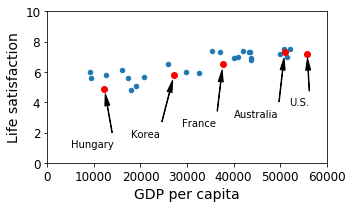

In [31]:
#Make a scatter plot with GDP per capita and Life satisfaction from the sample data
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
#Set the axis to be from x(0,60000) y(0,10)
plt.axis([0, 60000, 0, 10])
#Position text put the labels on the plot for example United States:(X, y)
position_text = {
    "Hungary": (5000, 1),
    "Korea": (18000, 1.7),
    "France": (29000, 2.4),
    "Australia": (40000, 3.0),
    "United States": (52000, 3.8),
}
#Basically put red labels on the stuff in the dictionary position_text
for country, pos_text in position_text.items():
    pos_data_x, pos_data_y = sample_data.loc[country]
    country = "U.S." if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")
save_fig('money_happy_scatterplot')
plt.show()

In [32]:
#No idea. Do not care
sample_data.loc[list(position_text.keys())]

,GDP per capita,Life satisfaction
Country,,
Hungary,12239.894,4.9
Korea,27195.197,5.8
France,37675.006,6.5
Australia,50961.865,7.3
United States,55805.204,7.2


Saving figure best_fit_model_plot at: .\images\fundamentals\best_fit_model_plot.png


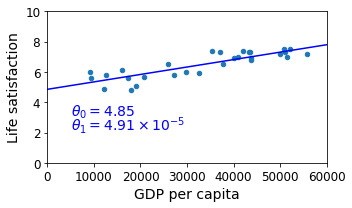

In [34]:
#Linear regression example
from sklearn import linear_model
lin1 = linear_model.LinearRegression()
#X sample is the sample_data related to GDP per capita
Xsample = np.c_[sample_data["GDP per capita"]]
#y sample is the sample_data related to Life satisfaction
ysample = np.c_[sample_data["Life satisfaction"]]
#Fit the model and get the intercept and slope
lin1.fit(Xsample, ysample)
t0, t1 = lin1.intercept_[0], lin1.coef_[0][0]
t0, t1
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
X=np.linspace(0, 60000, 1000)
plt.plot(X, t0 + t1*X, "b")
plt.text(5000, 3.1, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 2.2, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")
save_fig('best_fit_model_plot')
plt.show()